''''Please provide a step-by-step explanation of how to create a simple linear regression model to
predict a student's exam score based on the number of hours studied. Include instructions on 
generating synthetic data for this example and clarify the significance of the slope and 
intercept in interpreting the model's predictions'''

# Step 1: Data Generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# !pip install matplotlib
# !pip install scikit-learn

# Step 2: Data Preparation

In [2]:
# Generate synthetic data for the example
np.random.seed(0)
hours_studied = np.random.uniform(0, 10, 100)  # Random hours studied (0 to 10 hours)
exam_scores = 50 + 5 * hours_studied + np.random.normal(0, 2, 100)  # Linear relationship with noise


In [ ]:
'''
This line creates a synthetic exam_scores array using a linear relationship with added random noise.
50 + 5 * hours_studied defines a linear relationship where 50 is the intercept, and 5 is the slope (coefficient) of the line. It suggests that for every additional hour studied, the exam score increases by 5 points.
np.random.normal(0, 2, 100) generates 100 random numbers from a normal distribution with a mean of 0 and a standard deviation of 2. This adds random noise to the data, simulating real-world variability.
'''

In [3]:
# Create a DataFrame
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})


In [4]:
data

,Hours_Studied,Exam_Scores
0,5.488135,75.110376
1,7.151894,87.561121
2,6.027634,81.069494
3,5.448832,74.171672
4,4.236548,74.159244
...,...,...
95,1.831914,60.522757
96,5.865129,77.718827
97,0.201075,49.626278
98,8.289400,90.535936


# Step 3: Data Splitting

In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X = data[['Hours_Studied']]
y = data['Exam_Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [7]:
X_test

,Hours_Studied
22,4.614794
39,6.818203
85,2.653895
97,0.201075
55,1.613095
33,5.684339
80,3.179832
13,9.255966
27,9.446689
96,5.865129


# Step 4: Linear Regression Modeling

In [8]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Model Evaluation

In [9]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [13]:
# X_test, y_test, y_pred
X_test['y_test'] = y_test
X_test['y_pred'] = y_pred
display(X_test)

,Hours_Studied,y_test,y_pred
22,4.614794,70.532998,73.501782
39,6.818203,85.935428,84.487604
85,2.653895,64.958200,63.725076
97,0.201075,49.626278,51.495737
55,1.613095,59.418342,58.535826
33,5.684339,82.241827,78.834355
80,3.179832,64.903094,66.347307
13,9.255966,98.233110,96.641876
27,9.446689,95.738536,97.592788
96,5.865129,77.718827,79.735742


In [10]:
# Calculate Mean Squared Error (MSE) between the true values and predicted values
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared (R²) score between the true values and predicted values
r2 = r2_score(y_test, y_pred)
# Print the Mean Squared Error with formatting
print(f'Mean Squared Error: {mse:.2f}')
# Print the R-squared value with formatting
print(f'R-squared: {r2:.2f}')
print(mse)

# first column x_test, y_pred, y_test

Mean Squared Error: 3.25
R-squared: 0.98
3.2473516389694916


In [ ]:
# mean_squared_error(y_test, y_pred) computes the MSE between the actual values (y_test) and the predicted values (y_pred).
# MSE measures the average squared difference between actual and predicted values. A lower MSE indicates a better fit of the model to the data.

# r2_score(y_test, y_pred) computes the R-squared value between the actual values (y_test) and the predicted values (y_pred).
# R² measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model explains none of the variability.

In [18]:
X_test = np.array(X_test, ndmin=1).flatten()
X_test.ndim


1

In [28]:
dd = pd.DataFrame({'X_test': X_test,'y_test': y_test,'y_pred': y_pred})
dd

,X_test,y_test,y_pred
22,4.614794,70.532998,73.501782
39,6.818203,85.935428,84.487604
85,2.653895,64.958200,63.725076
97,0.201075,49.626278,51.495737
55,1.613095,59.418342,58.535826
33,5.684339,82.241827,78.834355
80,3.179832,64.903094,66.347307
13,9.255966,98.233110,96.641876
27,9.446689,95.738536,97.592788
96,5.865129,77.718827,79.735742


# Step 6: Visualization and Interpretation

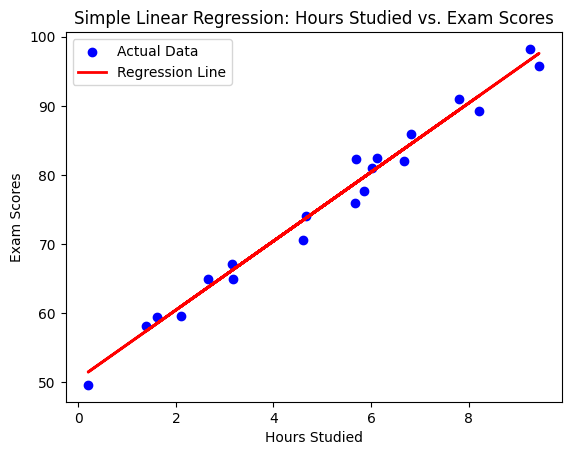

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual test data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
# Plotting the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
# Label the x-axis
plt.xlabel('Hours Studied')
# Label the y-axis
plt.ylabel('Exam Scores')
# Add a legend to the plot
plt.legend()
# Set the title of the plot
plt.title('Simple Linear Regression: Hours Studied vs. Exam Scores')
# Display the plot
plt.show()


In [19]:
# Extract the slope (coefficient) and intercept from the trained model
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept with formatting
print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

Slope (Coefficient): 4.99
Intercept: 50.49


In [20]:
# model.coef_[0] retrieves the slope (or coefficient) of the linear regression model. 
# This is the value that represents how much the dependent variable (e.g., exam scores) 
# changes for a one-unit change in the independent variable (e.g., hours studied). 
# In a simple linear regression model with one feature, coef_ is an array where the 
# first element (coef_[0]) represents the slope.


# model.intercept_ retrieves the intercept of the regression line. 
# The intercept is the value of the dependent variable when the independent variable is zero. 
# It represents the starting point of the regression line on the y-axis.